<a href="https://colab.research.google.com/github/RKayyy/102116008-SESS_LE1/blob/main/102116008_ReitikaKumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Reitika Kumar**  
Email: `rkumar_be21@thapar.edu`  
Roll No: **102116008**  
Group: **4CS09**  
Start Timestamp: YYYYMMDD-HHMM  

## **LAB Eval**

Brief Summary:

The paper introduces the Speech Commands dataset, designed to train speech recognition models with limited vocabulary for efficient, real-time applications. It includes 105,000 utterances of 35 words from 2,618 speakers, achieving 88.2% accuracy. This dataset enables low-power, accurate keyword detection in mobile and embedded systems.


In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz


!tar -xvzf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [ ]:
import os
import librosa
import numpy as np

dataset_path = '/content'

commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Commands (folders) in the dataset: ", commands)

sample_file = os.path.join(dataset_path, 'yes', '0a7c2a8d_nohash_0.wav')
y, sr = librosa.load(sample_file, sr=16000)

print(f"Sample rate: {sr}")
print(f"Audio duration: {len(y)/sr} seconds")


Commands (folders) in the dataset:  ['.config', 'zero', 'sheila', 'one', 'go', 'no', 'wow', 'forward', 'yes', 'three', 'house', 'six', 'stop', 'two', 'bird', 'cat', 'learn', 'on', 'up', 'off', 'follow', 'right', '_background_noise_', 'left', 'happy', 'dog', 'five', 'nine', 'eight', 'tree', 'seven', 'backward', 'down', 'visual', 'bed', 'marvin', 'four', 'sample_data']


In [ ]:
# Counting the number of audio files for each command and other directories
command_counts = {
    command: len(os.listdir(os.path.join(dataset_path, command)))
    for command in commands if os.path.isdir(os.path.join(dataset_path, command)) and command not in ['.config', '.ipynb_checkpoints']
}

for command, count in command_counts.items():
    print(f"Command: {command} - samples: {count}")

In [ ]:
import os
import librosa
import numpy as np

dataset_path = '/content'

commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

durations = []
for command in commands:
    for file in os.listdir(os.path.join(dataset_path, command)):
        if file.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dataset_path, command, file), sr=16000)
            durations.append(len(y) / sr)


mean_duration = np.mean(durations)
std_duration = np.std(durations)


print(f"Mean duration of audio clips: {mean_duration:.4f} seconds")
print(f"Standard deviation of durations: {std_duration:.4f} seconds")

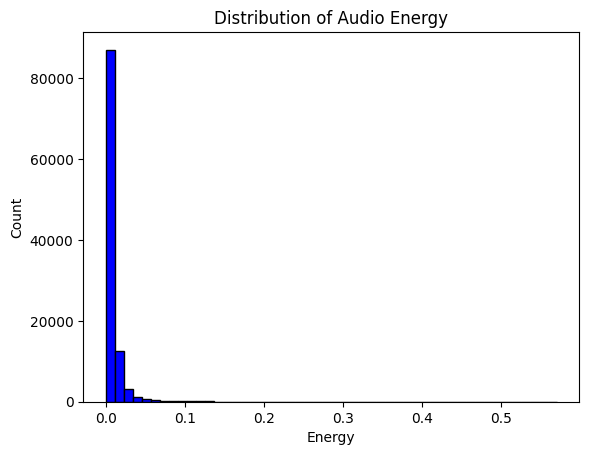

In [5]:
energies = []
for command in commands:
    for file in os.listdir(os.path.join(dataset_path, command)):
        if file.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dataset_path, command, file), sr=16000)
        energy = np.sum(y ** 2) / len(y)
        energies.append(energy)


import matplotlib.pyplot as plt

plt.hist(energies, bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Audio Energy")
plt.xlabel("Energy")
plt.ylabel("Count")
plt.show()

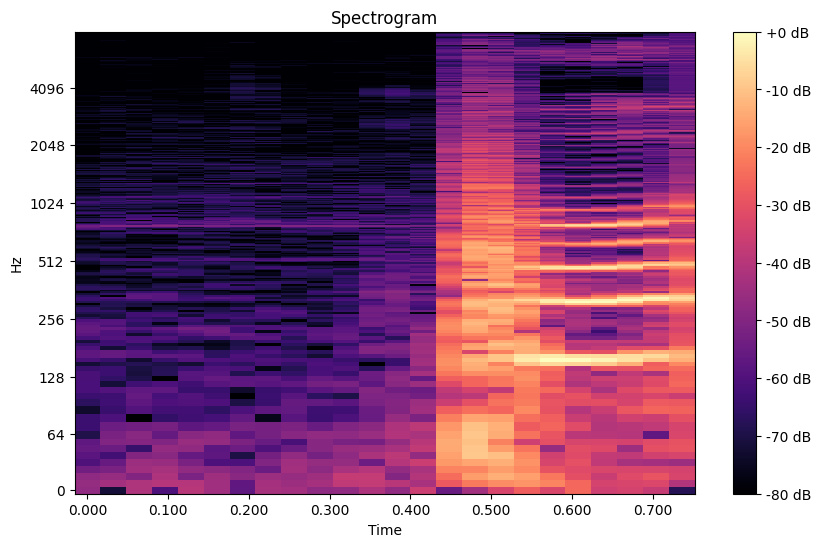

In [6]:
import librosa.display


D = np.abs(librosa.stft(y))


plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

### **Pre processing**

Build the CNN Model

In [7]:
def extract_features(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)


In [8]:
with open('/content/validation_list.txt', 'r') as f:
    validation_files = f.read().splitlines()

with open('/content/testing_list.txt', 'r') as f:
    testing_files = f.read().splitlines()

In [9]:
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

for command in commands:
    command_path = os.path.join(dataset_path, command)
    for file in os.listdir(command_path):
        if file.endswith('.wav'):
            file_path = os.path.join(command, file)
            features = extract_features(os.path.join(command_path, file))


            if file_path in validation_files:
                X_val.append(features)
                y_val.append(command)
            elif file_path in testing_files:
                X_test.append(features)
                y_test.append(command)
            else:
                X_train.append(features)
                y_train.append(command)

X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)


# Reshaping
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(commands), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    X_train_cnn, y_train_encoded,
    epochs=40,
    validation_data=(X_val_cnn, y_val_encoded),
    batch_size=32
)

Epoch 1/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0633 - loss: 4.4218 - val_accuracy: 0.1509 - val_loss: 3.0275
Epoch 2/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1293 - loss: 3.0953 - val_accuracy: 0.1779 - val_loss: 2.9062
Epoch 3/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1477 - loss: 3.0123 - val_accuracy: 0.1885 - val_loss: 2.8489
Epoch 4/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.1562 - loss: 2.9744 - val_accuracy: 0.1848 - val_loss: 2.8860
Epoch 5/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1628 - loss: 2.9585 - val_accuracy: 0.1872 - val_loss: 2.8505
Epoch 6/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1622 - loss: 2.9527 - val_accuracy: 0.1955 - val_loss: 2.8281
Epoch 7/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1669 - loss: 2.9279 - val_accuracy: 0.2034 - val_loss: 2.8103
Epoch 8/40
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.1671 - loss: 2

In [14]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1951 - loss: 2.7985
Test accuracy: 0.1984
Test loss: 2.8039


In [15]:
from sklearn.metrics import classification_report

# test set
y_pred = model.predict(X_test_cnn)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test_encoded, y_pred_classes))

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       165
           2       0.16      0.12      0.14       207
           3       0.35      0.42      0.38       185
           4       0.16      0.14      0.15       194
           5       1.00      0.00      0.01       220
           6       0.11      0.07      0.08       406
           7       0.24      0.60      0.34       408
           8       0.16      0.15      0.16       445
           9       0.43      0.10      0.17       172
          10       0.00      0.00      0.00       155
          11       0.13      0.26      0.17       400
          12       0.16      0.25      0.20       402
          13       0.15      0.05      0.07       203
          14       0.31      0.09      0.14       191
          15       0.21      0.12      0.16       161
          16       0.17      0.09      0.12       412
          17       0.14      0.01      0

In [17]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [18]:
!cp -r /content/drive/MyDrive/speech_recog_lab_eval/custom_data /content/



In [19]:
import os
dataset_path = '/content/custom_data'
commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Commands (folders) in the dataset: ", commands)


Commands (folders) in the dataset:  ['zero', 'sheila', 'one', 'go', 'no', 'wow', 'forward', 'yes', 'three', 'house', 'six', 'stop', 'two', 'bird', 'cat', 'learn', 'on', 'up', 'off', 'follow', 'right', 'left', 'happy', 'dog', 'five', 'nine', 'eight', 'tree', 'seven', 'backward', 'down', 'visual', 'bed', 'marvin', 'four']


In [20]:
dataset_path = '/content/custom_data'


In [21]:
from sklearn.model_selection import train_test_split

file_paths = []
labels = []

for command in commands:
    command_path = os.path.join(dataset_path, command)
    for file in os.listdir(command_path):
        if file.endswith('.wav'):
            file_paths.append(os.path.join(command, file))
            labels.append(command)


train_paths, test_paths, y_train, y_test = train_test_split(file_paths, labels, test_size=0.15, stratify=labels, random_state=42)
train_paths, val_paths, y_train, y_val = train_test_split(train_paths, y_train, test_size=0.15, stratify=y_train, random_state=42)


In [22]:
X_train, X_val, X_test = [], [], []

# Separating features on basis of given validation.txt and test.txt files
for file in train_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_train.append(features)


for file in val_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_val.append(features)


for file in test_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_test.append(features)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)


y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)


In [23]:
# Reshaping input to match 1D CNN input shape
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_cnn, y_train_encoded,
    epochs=50,
    validation_data=(X_val_cnn, y_val_encoded),
    batch_size=32
)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0239 - loss: 5.5571 - val_accuracy: 0.0522 - val_loss: 3.9453
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0575 - loss: 4.0365 - val_accuracy: 0.0746 - val_loss: 3.5973
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0439 - loss: 3.7881 - val_accuracy: 0.0896 - val_loss: 3.4578
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0678 - loss: 3.5411 - val_accuracy: 0.0896 - val_loss: 3.3178
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0957 - loss: 3.4606 - val_accuracy: 0.1940 - val_loss: 3.1267
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1322 - loss: 3.2424 - val_accuracy: 0.2836 - val_loss: 2.9220
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2272 - loss: 2.9733 - val_accuracy: 0.3134 - val_loss: 2.7046
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2204 - loss: 2.8471 - val_accuracy: 0.4104 - val_loss

In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cnn)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test_encoded, y_pred_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.60      0.75         5
           3       1.00      0.40      0.57         5
           4       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         4
           9       0.50      0.25      0.33         4
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       0.60      0.75      0.67         4
          13       1.00      1.00      1.00         4
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         4
          16       0.80      1.00      0.89

In [26]:
import librosa
import numpy as np
import tensorflow as tf

test_audio_path = '/content/0a1c3j4e_nohash_3.wav' # Uploaded a file that contained the word 'down'

def extract_features(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

test_features = extract_features(test_audio_path)

test_features_cnn = test_features.reshape(1, test_features.shape[0], 1)

predictions = model.predict(test_features_cnn)

predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

predicted_command = le.inverse_transform([predicted_class_index])

print(f'Predicted Command: {predicted_command[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Command: down


In [27]:
model.save_weights('/content/model_weights.weights.h5')


In [ ]:
!zip -r custom_data.zip /content/custom_data
